In [60]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/")


In [301]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
'''
Using beautiful soup to parse html of a url from web
Find the tables.
Since the tables don't have a specific class or id and the column -
    headers may vary I manualy found the index of the tables that -
    display auction information
Find the Table headers and place them in a list
'''
url = "https://en.wikipedia.org/wiki/List_of_2008_Indian_Premier_League_auctions_and_personnel_signings"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all("table")
headers = []
for th in table[2].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [63]:
'''
Create a pandas DataFrame using the table headers as columns
Place all the table rows from selected table in the parsed html in to the DataFrame
Remove any spacing or special characters 
Remove unnecessary columns
Change the Name of the columns to be same as other tables
Change the type of columns as needed
Convert the money as needed
Add Year column
'''
theTable08 = pd.DataFrame(columns = headers)
for tr in table[2].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip() for elem in rowData]
    length = len(theTable08)
    theTable08.loc[length] = row
theTable08 = theTable08.drop(theTable08.columns[[0, 1, 3, 4, 5]], axis = 1)
theTable08 = theTable08.rename(columns={"Name": "Player", "Auctioned Price(in US$ thousands)": "Amount"})
theTable08["Amount"] = pd.to_numeric(theTable08["Amount"])
theTable08['Amount'] = theTable08["Amount"].apply(lambda x: x*81525)
theTable08["Year"] = 2008

In [64]:
url = "https://en.wikipedia.org/wiki/List_of_2009_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [65]:
table = soup.find_all("table")
headers = []
for th in table[7].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [66]:
theTable09 = pd.DataFrame(columns = headers)
for tr in table[7].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable09)
    theTable09.loc[length] = row
theTable09 = theTable09.drop(theTable09.columns[[0, 4]], axis = 1)
theTable09 = theTable09.rename(columns={"Winning bid": "Amount"})
theTable09["Amount"] = pd.to_numeric(theTable09["Amount"])
theTable09['Amount'] = theTable09["Amount"].apply(lambda x: x*81.53)
theTable09["Year"] = 2009

In [67]:
url = "https://en.wikipedia.org/wiki/List_of_2010_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [68]:
table = soup.find_all("table")
headers = []
for th in table[0].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [69]:
theTable10 = pd.DataFrame(columns = headers)
for tr in table[0].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable10)
    theTable10.loc[length] = row
theTable10 = theTable10.drop(theTable10.columns[[3]], axis = 1)
theTable10 = theTable10.rename(columns={"Franchise": "Team", "Sold price (USD)": "Amount"})
theTable10["Amount"] = pd.to_numeric(theTable10["Amount"])
theTable10['Amount'] = theTable10["Amount"].apply(lambda x: x*81.53)
theTable10["Year"] = 2010

In [70]:
url = "https://en.wikipedia.org/wiki/List_of_2011_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [71]:
table = soup.find_all("table")
headers = []
for th in table[2].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [72]:
theTable11 = pd.DataFrame(columns = headers)
for tr in table[2].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable11)
    theTable11.loc[length] = row
theTable11 = theTable11.drop(theTable11.columns[[0, 4]], axis = 1)
theTable11 = theTable11.rename(columns={"Winning bid": "Amount"})
theTable11["Amount"] = pd.to_numeric(theTable11["Amount"])
theTable11['Amount'] = theTable11["Amount"].apply(lambda x: x*81.53)
theTable11["Year"] = 2011

In [73]:
url = "https://en.wikipedia.org/wiki/List_of_2012_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [74]:
table = soup.find_all("table")
headers = []
for th in table[9].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [75]:
theTable12 = pd.DataFrame(columns = headers)
for tr in table[9].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable12)
    theTable12.loc[length] = row
theTable12 = theTable12.drop(theTable12.columns[[0, 3]], axis = 1)
theTable12 = theTable12.rename(columns={"Winning bid": "Amount"})
theTable12["Amount"] = pd.to_numeric(theTable12["Amount"])
theTable12['Amount'] = theTable12["Amount"].apply(lambda x: x*81.53)
theTable12["Year"] = 2012

In [232]:
'''
Combine all the DataFrames from 2008 to 2012
Read in csv to DataFrames
Remove unnecessary columns
Combine DataFrames to include data from 2008 to 2022
Write to a new csv file
'''
theTable08To12 = pd.concat([theTable08, theTable09, theTable10, theTable11, theTable12])
theTable13_22 = pd.read_csv ('/Users/sepehr/Documents/ECE143/Final/IPLPlayerAuctionData13-22.csv')
theTable13_22 = theTable13_22.drop(theTable13_22.columns[[1, 5]], axis = 1)
theTable = pd.concat([theTable08To12, theTable13_22])
theTable["Amount"] = pd.to_numeric(theTable["Amount"])
theTable['Amount'] = theTable["Amount"].apply(lambda x: x//81.53).round(-3)
theTable.loc[theTable['Team'] == 'Pune Warriors India', 'Team'] = 'Pune Warriors'
theTable.loc[theTable['Team'] == 'Delhi Capitals', 'Team'] = 'Delhi Daredevils'
theTable.loc[theTable['Team'] == 'Rising Pune Supergiant', 'Team'] = 'Rising Pune Supergiants'
thePath = os.getcwd() + '/IPL Player Auction 08-22.csv'
theTable.to_csv(thePath, index=False)

In [92]:
matches = pd.read_csv ('data/matches.csv')


In [93]:
matches = matches.drop(matches.columns[[0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]], axis = 1)


In [97]:
matches = matches.rename(columns={"season": "Year", "winner": "Winner", "player_of_match": "MVP", "team1": "Team1", "team2": "Team2"})

In [124]:
matches

,Year,Team1,Team2,Winner,MVP
0,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,BB McCullum
1,2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,MEK Hussey
2,2008,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,MF Maharoof
3,2008,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,MV Boucher
4,2008,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,DJ Hussey
...,...,...,...,...,...
572,2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,V Kohli
573,2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,AB de Villiers
574,2016,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,MC Henriques
575,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,DA Warner


In [110]:
amounts = theTable[(theTable['Year'] == 2008) & (theTable['Team'] == "Kolkata Knight Riders")]['Amount'].tolist()

In [114]:
avgSpent = sum(amounts)/len(amounts)

495000.0

In [138]:
val

[495000.0,
 600000.0,
 750000.0,
 714583.3333333334,
 550000.0,
 310500.0,
 238894.73684210525,
 69857.14285714286,
 99857.14285714286]

In [128]:
games = matches[(matches['Year'] == 2008) & 
((matches['Team1'] == "Kolkata Knight Riders") | (matches['Team2'] == "Kolkata Knight Riders"))]["Winner"].tolist()

In [134]:
occurance = games.count("Kolkata Knight Riders")
ratio = (occurance/(len(games) - occurance))
if ratio < 1:   winLoss = -1
elif ratio > 1: winLoss = 1
else :          winLoss = 0
winLoss

-1

In [218]:
valA2


[2.0, 1.0, 0.4, 1.0, 1.0, 1.0, 2.4, 0.2727272727272727, 0.4]

In [216]:
valA1 = []
for year in range(8, 17):
    amountsYr = theTable[(theTable['Year'] == (2000+year)) & (theTable['Team'] == "Kings XI Punjab")]['Amount'].tolist()
    valA1.append(sum(amountsYr)/len(amountsYr))
valA2 = []
for year in range(8,17):
    gamesYr = matches[(matches['Year'] == (2000+year)) & ((matches['Team1'] == "Kings XI Punjab") | (matches['Team2'] == "Kings XI Punjab"))]["Winner"].tolist()
    occuranceYr = gamesYr.count("Kings XI Punjab")
    valA2.append((occuranceYr/(len(gamesYr) - occuranceYr)))
valA3 = []
for i in range(len(valA1)):
    valA3.append(valA1[i]/(1/valA2[i]))


In [217]:
amountsYr

[12000.0, 37000.0, 98000.0, 258000.0, 67000.0, 797000.0, 12000.0, 12000.0]

In [184]:
theTable

,Player,Team,Amount,Year
0,Shane Warne,Rajasthan Royals,450000.0,2008.0
1,Mahendra Singh Dhoni,Chennai Super Kings,1500000.0,2008.0
2,Adam Gilchrist,Deccan Chargers,700000.0,2008.0
3,Shoaib Akhtar,Kolkata Knight Riders,425000.0,2008.0
4,Mahela Jayawardene,Kings XI Punjab,475000.0,2008.0
...,...,...,...,...
965,Yuzvendra Singh Chahal,Royal Challengers Bangalore,12000.0,2014.0
966,Yuzvendra Singh Chahal,Royal Challengers Bangalore,736000.0,2018.0
967,Zaheer Khan,Mumbai Indians,319000.0,2014.0
968,Zaheer Khan,Delhi Daredevils,491000.0,2015.0


In [263]:
totalBidMat17 = np.array([np.array(xi) for xi in totalBidYr])#sum of bids per year for each team until 2017

In [320]:
totalBidMat16 = np.array([np.array(xi) for xi in totalBidYr])#sum of bids per year for each team until 2016

In [405]:
totalWLMat = np.array([np.array(xi) for xi in totalWLYr])#Win Loss ration for each team per year until 2016

In [432]:
years = []
for elem in range(len(matches["Year"].unique().tolist())):
    years.append(matches["Year"].unique()[elem].astype(str))

In [264]:
totalBidPerYear17 = pd.DataFrame(totalBidMat17, columns = [np.append(matches["Year"].unique(), 2017)], index = [matches["Team1"].unique()])#dataframe of sum of bids until 2017

In [433]:

totalBidPerYear16 = pd.DataFrame(totalBidMat16, columns = years, index = [matches["Team1"].unique()])
#dataframe of sum of bids until 2016

In [434]:
winLossPerYear = pd.DataFrame(totalWLMat, columns = years, index = [matches["Team1"].unique()])
#dataframe win loss ratio until 2016

In [435]:
totalBidPerYear16

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Kolkata Knight Riders,4950000.0,600000.0,750000.0,8575000.0,1650000.0,621000.0,4539000.0,489000.0,699000.0
Chennai Super Kings,5825000.0,1740000.0,150000.0,4115000.0,2000000.0,1181000.0,2551000.0,503000.0,0.0
Rajasthan Royals,2700000.0,1025000.0,150000.0,3095000.0,1155000.0,579000.0,2080000.0,257000.0,0.0
Mumbai Indians,3850000.0,1175000.0,750000.0,4020000.0,1700000.0,1840000.0,2569000.0,624000.0,1606000.0
Deccan Chargers,5885000.0,250000.0,720000.0,6875000.0,820000.0,0.0,0.0,0.0,0.0
Kings XI Punjab,4620000.0,600000.0,300000.0,6945000.0,550000.0,736000.0,4833000.0,417000.0,1293000.0
Royal Challengers Bangalore,3800000.0,1710000.0,220000.0,6840000.0,1220000.0,1670000.0,3740000.0,2305000.0,1893000.0
Delhi Daredevils,4825000.0,550000.0,610000.0,6450000.0,1900000.0,699000.0,7356000.0,4711000.0,3802000.0
Kochi Tuskers Kerala,0.0,0.0,0.0,7590000.0,0.0,0.0,0.0,0.0,0.0
Pune Warriors,0.0,0.0,0.0,8270000.0,0.0,2300000.0,0.0,0.0,0.0


In [436]:
winLossPerYear

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Kolkata Knight Riders,0.857143,0.300000,1.000000,1.142857,2.400000,0.600000,2.200000,1.166667,1.142857
Chennai Super Kings,1.285714,1.333333,1.285714,2.200000,1.250000,2.000000,1.666667,1.428571,NaN
Rajasthan Royals,4.333333,0.857143,0.750000,0.857143,0.777778,1.571429,1.000000,1.000000,NaN
Mumbai Indians,1.000000,0.625000,2.200000,1.666667,1.428571,2.166667,0.875000,1.666667,1.000000
Deccan Chargers,0.166667,1.285714,1.000000,0.750000,0.363636,NaN,NaN,NaN,NaN
Kings XI Punjab,2.000000,1.000000,0.400000,1.000000,1.000000,1.000000,2.400000,0.272727,0.400000
Royal Challengers Bangalore,0.400000,1.285714,1.000000,1.666667,1.142857,1.285714,0.555556,1.000000,1.285714
Delhi Daredevils,1.000000,2.000000,1.000000,0.400000,1.571429,0.230769,0.166667,0.555556,1.000000
Kochi Tuskers Kerala,NaN,NaN,NaN,0.750000,NaN,NaN,NaN,NaN,NaN
Pune Warriors,NaN,NaN,NaN,0.400000,0.333333,0.333333,NaN,NaN,NaN


In [361]:
thePath = os.getcwd() + '/auctionSpending.csv'
totalBidPerYear16.to_csv(thePath, index=True)
thePath = os.getcwd() + '/IwinLossRatio.csv'
winLossPerYear.to_csv(thePath, index=True)

In [319]:
# matWL = matches["Team1"].unique()
# newDF = pd.DataFrame(columns = [matches["Year"].unique()], index = [matches["Team1"].unique()])
totalBidYr = []

for elem in matches["Team1"].unique():
    yearbid = []
    for year in range(8,17):
        yearbid.append(sum(theTable[(theTable['Year'] == (2000+year)) & (theTable['Team'] == elem)]['Amount'].tolist()))
    totalBidYr.append(yearbid)

In [404]:
totalWLYr = []

for elem in matches["Team1"].unique():
    winLossYr = []
    for year in range(8,17):
        gamesYr=matches[(matches['Year'] == (2000+year)) & ((matches['Team1'] == elem) | (matches['Team2'] == elem))]["Winner"].tolist()
        
        occuranceYr = gamesYr.count(elem)
        # print(len(gamesYr), occuranceYr, elem, year)
        # if len(gamesYr) > 0:
        #     if (occuranceYr/(len(gamesYr) - occuranceYr)) >= 1:
        #         winLossYr.append(1)
        #     else:
        #         winLossYr.append(-1)
        # else:
        #     winLossYr.append(0)
        if len(gamesYr) > 0:
            winLossYr.append((occuranceYr/(len(gamesYr) - occuranceYr)))
        else:
            winLossYr.append(np.nan) #np.nan or -1
    totalWLYr.append(winLossYr)

In [378]:
winLossPerYear.iloc[2].corr(totalBidPerYear16.iloc[2])

0.02088060377240576

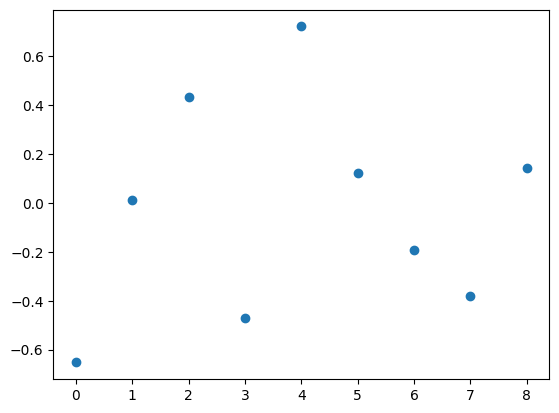

In [437]:
plt.plot((winLossPerYear.corrwith(totalBidPerYear16, axis=0).to_numpy()), 'o')


In [409]:
winLossPerYear.corrwith(totalBidPerYear16, axis=0)

2008   -0.652631
2009    0.013018
2010    0.433064
2011   -0.470188
2012    0.721209
2013    0.120481
2014   -0.191300
2015   -0.380805
2016    0.144306
dtype: float64

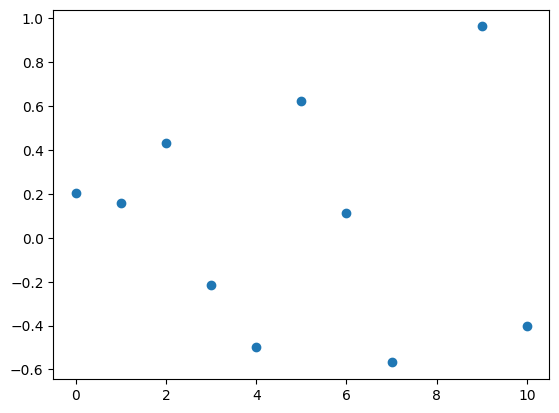

In [438]:
plt.plot((winLossPerYear.corrwith(totalBidPerYear16, axis=1).to_numpy()), 'o')


In [394]:
winLossPerYear.corrwith(totalBidPerYear16, axis=1)

Kolkata Knight Riders          0.127208
Chennai Super Kings            0.389941
Rajasthan Royals               0.020881
Mumbai Indians                 0.065514
Deccan Chargers               -0.643863
Kings XI Punjab                0.473978
Royal Challengers Bangalore   -0.339620
Delhi Daredevils              -0.498967
Kochi Tuskers Kerala          -1.000000
Pune Warriors                 -0.636573
Sunrisers Hyderabad           -0.157189
Rising Pune Supergiants       -1.000000
Gujarat Lions                  1.000000
dtype: float64

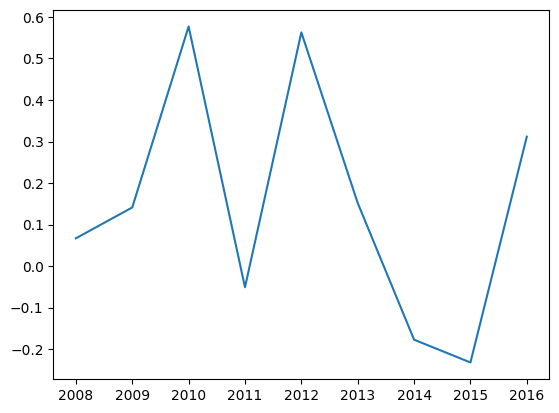

In [397]:
plt.plot(matches["Year"].unique(), winLossPerYear.corrwith(totalBidPerYear16, axis=0).to_numpy())

In [ ]:
plt.scatter(matches["Year"].unique(), y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)

In [380]:
winLossPerYear.corrwith(totalBidPerYear16, axis=0)

2008    0.066983
2009    0.141257
2010    0.577094
2011   -0.050904
2012    0.562845
2013    0.151994
2014   -0.177178
2015   -0.232067
2016    0.311783
dtype: float64

In [381]:
winLossPerYear.corrwith(totalBidPerYear16, axis=1)

Kolkata Knight Riders          0.127208
Chennai Super Kings            0.389941
Rajasthan Royals               0.020881
Mumbai Indians                 0.065514
Deccan Chargers               -0.643863
Kings XI Punjab                0.473978
Royal Challengers Bangalore   -0.339620
Delhi Daredevils              -0.498967
Kochi Tuskers Kerala          -1.000000
Pune Warriors                 -0.636573
Sunrisers Hyderabad           -0.157189
Rising Pune Supergiants       -1.000000
Gujarat Lions                  1.000000
dtype: float64

In [384]:
bidMat = totalBidPerYear16.to_numpy()
wlMat = winLossPerYear.to_numpy()

In [385]:
bidMat = (bidMat - bidMat.mean(axis=0))/bidMat.std(axis=0)
wlMat = (wlMat - wlMat.mean(axis=0))/wlMat.std(axis=0)
correlation = (np.dot(wlMat.T, bidMat)/wlMat.shape[0])[0]
# np.corrcoef(np.hstack((A,B)),rowvar=False)[0,1:]

In [386]:
print(bidMat,"\n\n")
print(wlMat,"\n\n")
print(correlation)

[[ 0.91167757  0.01866838  1.56137434  1.2180777   1.04358313 -0.29710353
   0.88643304 -0.26034213 -0.47281368]
 [ 1.2834407   1.86310435 -0.43513711 -0.23211008  1.49774892  0.45942452
   0.03158862 -0.24953413 -1.03888192]
 [-0.04428475  0.70628705 -0.43513711 -0.56376738  0.40126295 -0.35384313
  -0.17094242 -0.43944611 -1.03888192]
 [ 0.44431821  0.948976    1.56137434 -0.26299973  1.10846396  1.34969591
   0.03932866 -0.15612214  0.26169832]
 [ 1.30893302 -0.54760582  1.46154877  0.66531554 -0.03343858 -1.13603909
  -1.06534704 -0.63785009 -1.03888192]
 [ 0.77146976  0.01866838  0.06399075  0.68807633 -0.38379504 -0.14174509
   1.01285369 -0.31592612  0.00822285]
 [ 0.42307461  1.81456656 -0.20221078  0.65393514  0.48560803  1.12003561
   0.54286126  1.14160974  0.49411833]
 [ 0.85856855 -0.06222793  1.09552167  0.527125    1.36798726 -0.19172998
   2.09774928  2.99904156  2.04007579]
 [-1.19143954 -0.95208739 -0.93426497  0.8978008  -1.09748413 -1.13603909
  -1.06534704 -0.63785

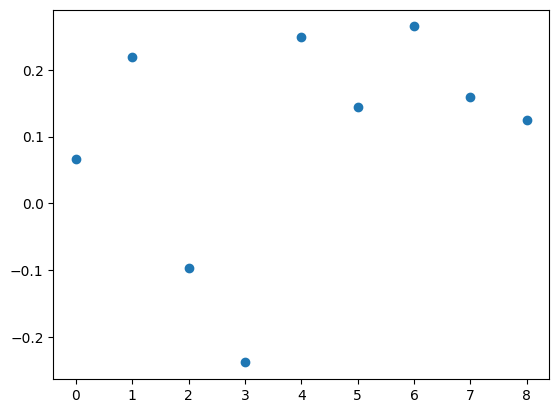

In [392]:
plt.plot(correlation, 'o')

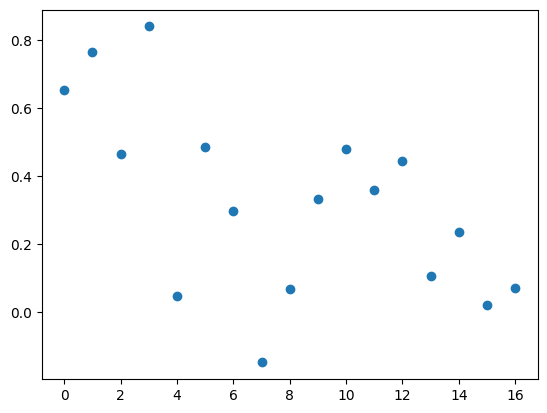

In [391]:
plt.plot(np.corrcoef(np.hstack((bidMat,wlMat)),rowvar=False)[0,1:], 'o')

In [471]:
winLossPerYear[years[0]].notna()
winLossPerYear[winLossPerYear[years[5]].notna()]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Kolkata Knight Riders,0.857143,0.300000,1.000000,1.142857,2.400000,0.600000,2.200000,1.166667,1.142857
Chennai Super Kings,1.285714,1.333333,1.285714,2.200000,1.250000,2.000000,1.666667,1.428571,NaN
Rajasthan Royals,4.333333,0.857143,0.750000,0.857143,0.777778,1.571429,1.000000,1.000000,NaN
Mumbai Indians,1.000000,0.625000,2.200000,1.666667,1.428571,2.166667,0.875000,1.666667,1.000000
Kings XI Punjab,2.000000,1.000000,0.400000,1.000000,1.000000,1.000000,2.400000,0.272727,0.400000
Royal Challengers Bangalore,0.400000,1.285714,1.000000,1.666667,1.142857,1.285714,0.555556,1.000000,1.285714
Delhi Daredevils,1.000000,2.000000,1.000000,0.400000,1.571429,0.230769,0.166667,0.555556,1.000000
Pune Warriors,NaN,NaN,NaN,0.400000,0.333333,0.333333,NaN,NaN,NaN
Sunrisers Hyderabad,NaN,NaN,NaN,NaN,NaN,1.428571,0.750000,1.000000,1.833333


In [430]:
stuf = []
for elem in range(len(matches["Year"].unique().tolist())):
    stuf.append(matches["Year"].unique()[elem].astype(str))


In [474]:
allTeamWLRatio = []
for i in range(len(years)):
    allTeamWLRatio.append(sum(winLossPerYear[winLossPerYear[years[i]].notna()][years[i]].to_numpy())/winLossPerYear.count()[i])
allTeamWLRatio

[1.3803571428571428,
 1.0858630952380952,
 1.0794642857142858,
 1.0833333333333335,
 1.1408449575116242,
 1.1796092796092799,
 1.2017361111111111,
 1.0112734487734487,
 1.0628968253968254]

In [446]:
allTeamBidYear = []
for i in range(len(years)):
    allTeamBidYear.append(sum(totalBidPerYear16[years[i]].to_numpy()))

allTeamBidYear

[36455000.0,
 7650000.0,
 3650000.0,
 62775000.0,
 10995000.0,
 10932000.0,
 32208000.0,
 10741000.0,
 16677000.0]

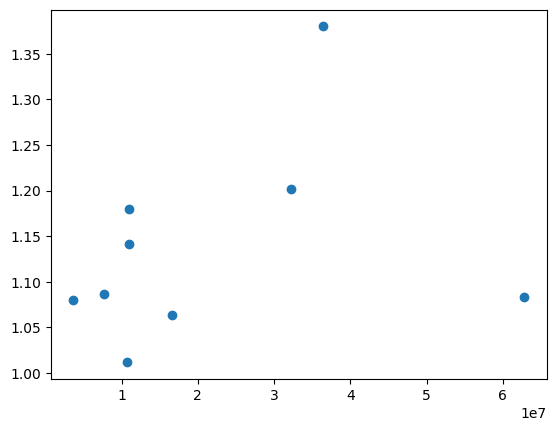

In [477]:
plt.plot(allTeamBidYear,allTeamWLRatio, 'o')#spending to win/ratio

In [144]:
sum(val)/sum(val1)

152856.53892335398

In [149]:
sum(val)/(1/sum(val1))

95899627.58085692

In [148]:
val2 = []
for i in range(len(val)):
    val2.append(val[i]/(1/val1[i]))
val2

[424285.71428571426,
 180000.0,
 875000.0,
 1143333.3333333335,
 6600000.0,
 266142.8571428571,
 1313921.0526315789,
 81500.0,
 159771.42857142858]

In [142]:
val1

[0.8571428571428571,
 0.3,
 1.1666666666666667,
 1.6,
 12.0,
 0.8571428571428571,
 5.5,
 1.1666666666666667,
 1.6]

In [147]:
val2

[577500.0,
 2000000.0,
 642857.1428571428,
 446614.5833333333,
 45833.333333333336,
 362250.0,
 43435.40669856459,
 59877.55102040816,
 62410.71428571428]

In [151]:
valA3

[1711111.111111111,
 350000.0,
 66666.66666666667,
 736590.9090909092,
 293333.3333333334,
 588800.0,
 2761714.285714286,
 41700.0,
 71833.33333333333]

In [177]:
a = matches["Team1"].unique().tolist()
b = theTable["Team"].unique().tolist()

In [178]:
print(a)
print(b)

['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions']
['Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Unsold', 'Mumbai Indians', 'Pune Warriors India', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad', 'Gujarat Lions', 'Gujarat Titans', 'Rising Pune Supergiant', 'Delhi Capitals', 'Lucknow Super Giants', 'Punjab Kings']


In [179]:
b.sort()

In [173]:
print(a)

['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [180]:
print(b)

['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors India', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Unsold']


In [231]:
print(len(b), len(a)

18 13


In [160]:
set(matches["Team1"].unique().tolist() + matches["Team2"].unique().tolist())

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [ ]:
autionInYr = 
winInYear = 
lossInYear = 
#Table 1
#In year Y_i find team T 
#find total win/loss in Y_i -> get ratio R
#find total amount spent in auction in Y_i -> A
#put A R Y_i T in new table, rows for each Year Y_i


In [ ]:
#Table 2
#average each team T_i W/L ratio in Year Y_i and amount spent in auction in Y_i A_i
#calculate a ratio of (W/L ratio) to A_i

In [ ]:
#Table 3
#Get player P from auctions and cost C
#get P's team T in year Y_i
#put P C T Y_i in new table